In [64]:
import pandas as pd

In [65]:
df = pd.read_csv('../cleaned_data_v2.csv')

In [66]:
pd.set_option('display.max_columns', None)

In [67]:
df

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21608  360000.0         3       2.50      1131     3.0           0     0   
21609  400000.0         4       2.50      5813     2.0           0     0   
21610  402101.0         2       0.75      1350     2.0           0     0   
21611  400000.0         3       2.50      2388     2.0           0     0   
21612  325000.0         2       0.75      1076     2.0           0     0   

       condition  yr_built  yr_renovated  zipcode      lat     long  \
0              3      1955             0    98178  47.5112 -122.257   
1              3      1951          1991    98125  47.7210 -122.319   
2              3      1933             0    98028  47.7379 -122.233   
3              5      1965             0    98136  47.5208 -122.393   
4              3      1987             0    98074  47.6168 -122.045   
...          ...       ...           ...      ...      ...      ...   
21608          3      2009             0    98103  47.6993 -122.346   
21609          3      2014             0    98146  47.5107 -122.362   
21610          3      2009             0    98144  47.5944 -122.299   
21611          3      2004             0    98027  47.5345 -122.069   
21612          3      2008             0    98144  47.5941 -122.299   

       nearest_station_distance_km     bathroom_category  density  \
0                      8620.002287  Studio or 1 Bathroom   5364.0   
1                      2078.181042         2-3 Bathrooms   7999.0   
2                      8109.552186  Studio or 1 Bathroom   3833.0   
3                      8918.318639         2-3 Bathrooms   7517.0   
4                     19789.800401         1-2 Bathrooms   2896.0   
...                            ...                   ...      ...   
21608                  1372.516972         2-3 Bathrooms  11391.0   
21609                  8505.181320         2-3 Bathrooms   6034.0   
21610                  1942.180508  Studio or 1 Bathroom   9389.0   
21611                 18943.445917         2-3 Bathrooms    487.0   
21612                  1913.332127  Studio or 1 Bathroom   9389.0   

       commute_time  distance_to_point_km  is_near_shore  grade_living  
0              32.9              0.595763          False          8260  
1              28.9              3.038596          False         17990  
2              33.1              2.317669          False          4620  
3              30.6              0.101668           True         13720  
4              32.7              1.750656          False         13440  
...             ...                   ...            ...           ...  
21608          27.1              1.708484          False         12240  
21609          29.8              1.990125          False         18480  
21610          29.3              0.886906          False          7140  
21611          29.3              2.354171          False         12800  
21612          29.3              0.883168          False          7140  

[21613 rows x 20 columns]

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
cont_cols = ['price','bathrooms','sqft_lot','floors','yr_built','yr_renovated','lat','long','nearest_station_distance_km','density','commute_time','distance_to_point_km','grade_living']
cat_cols = ['bedrooms','waterfront','view','condition','zipcode','bathroom_category','is_near_shore']

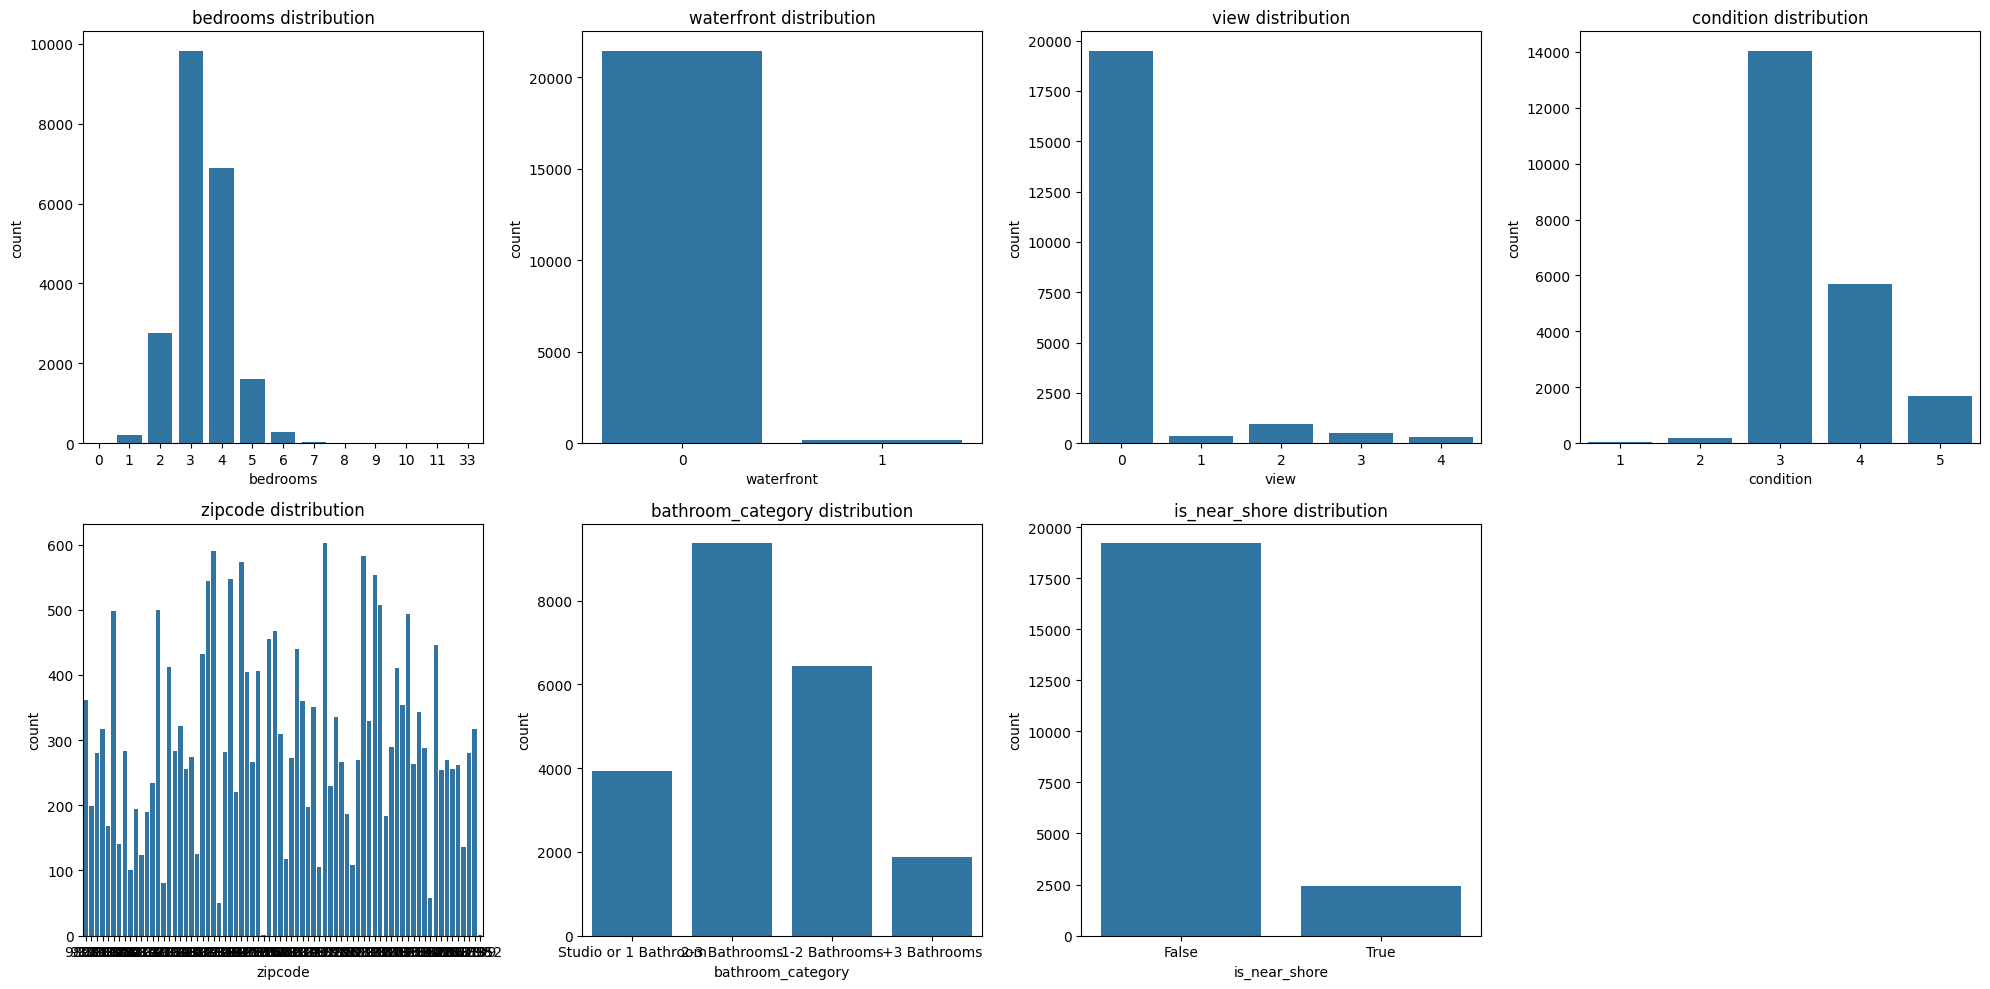

In [70]:

# Assuming cat_cols contains the list of categorical columns
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')

plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

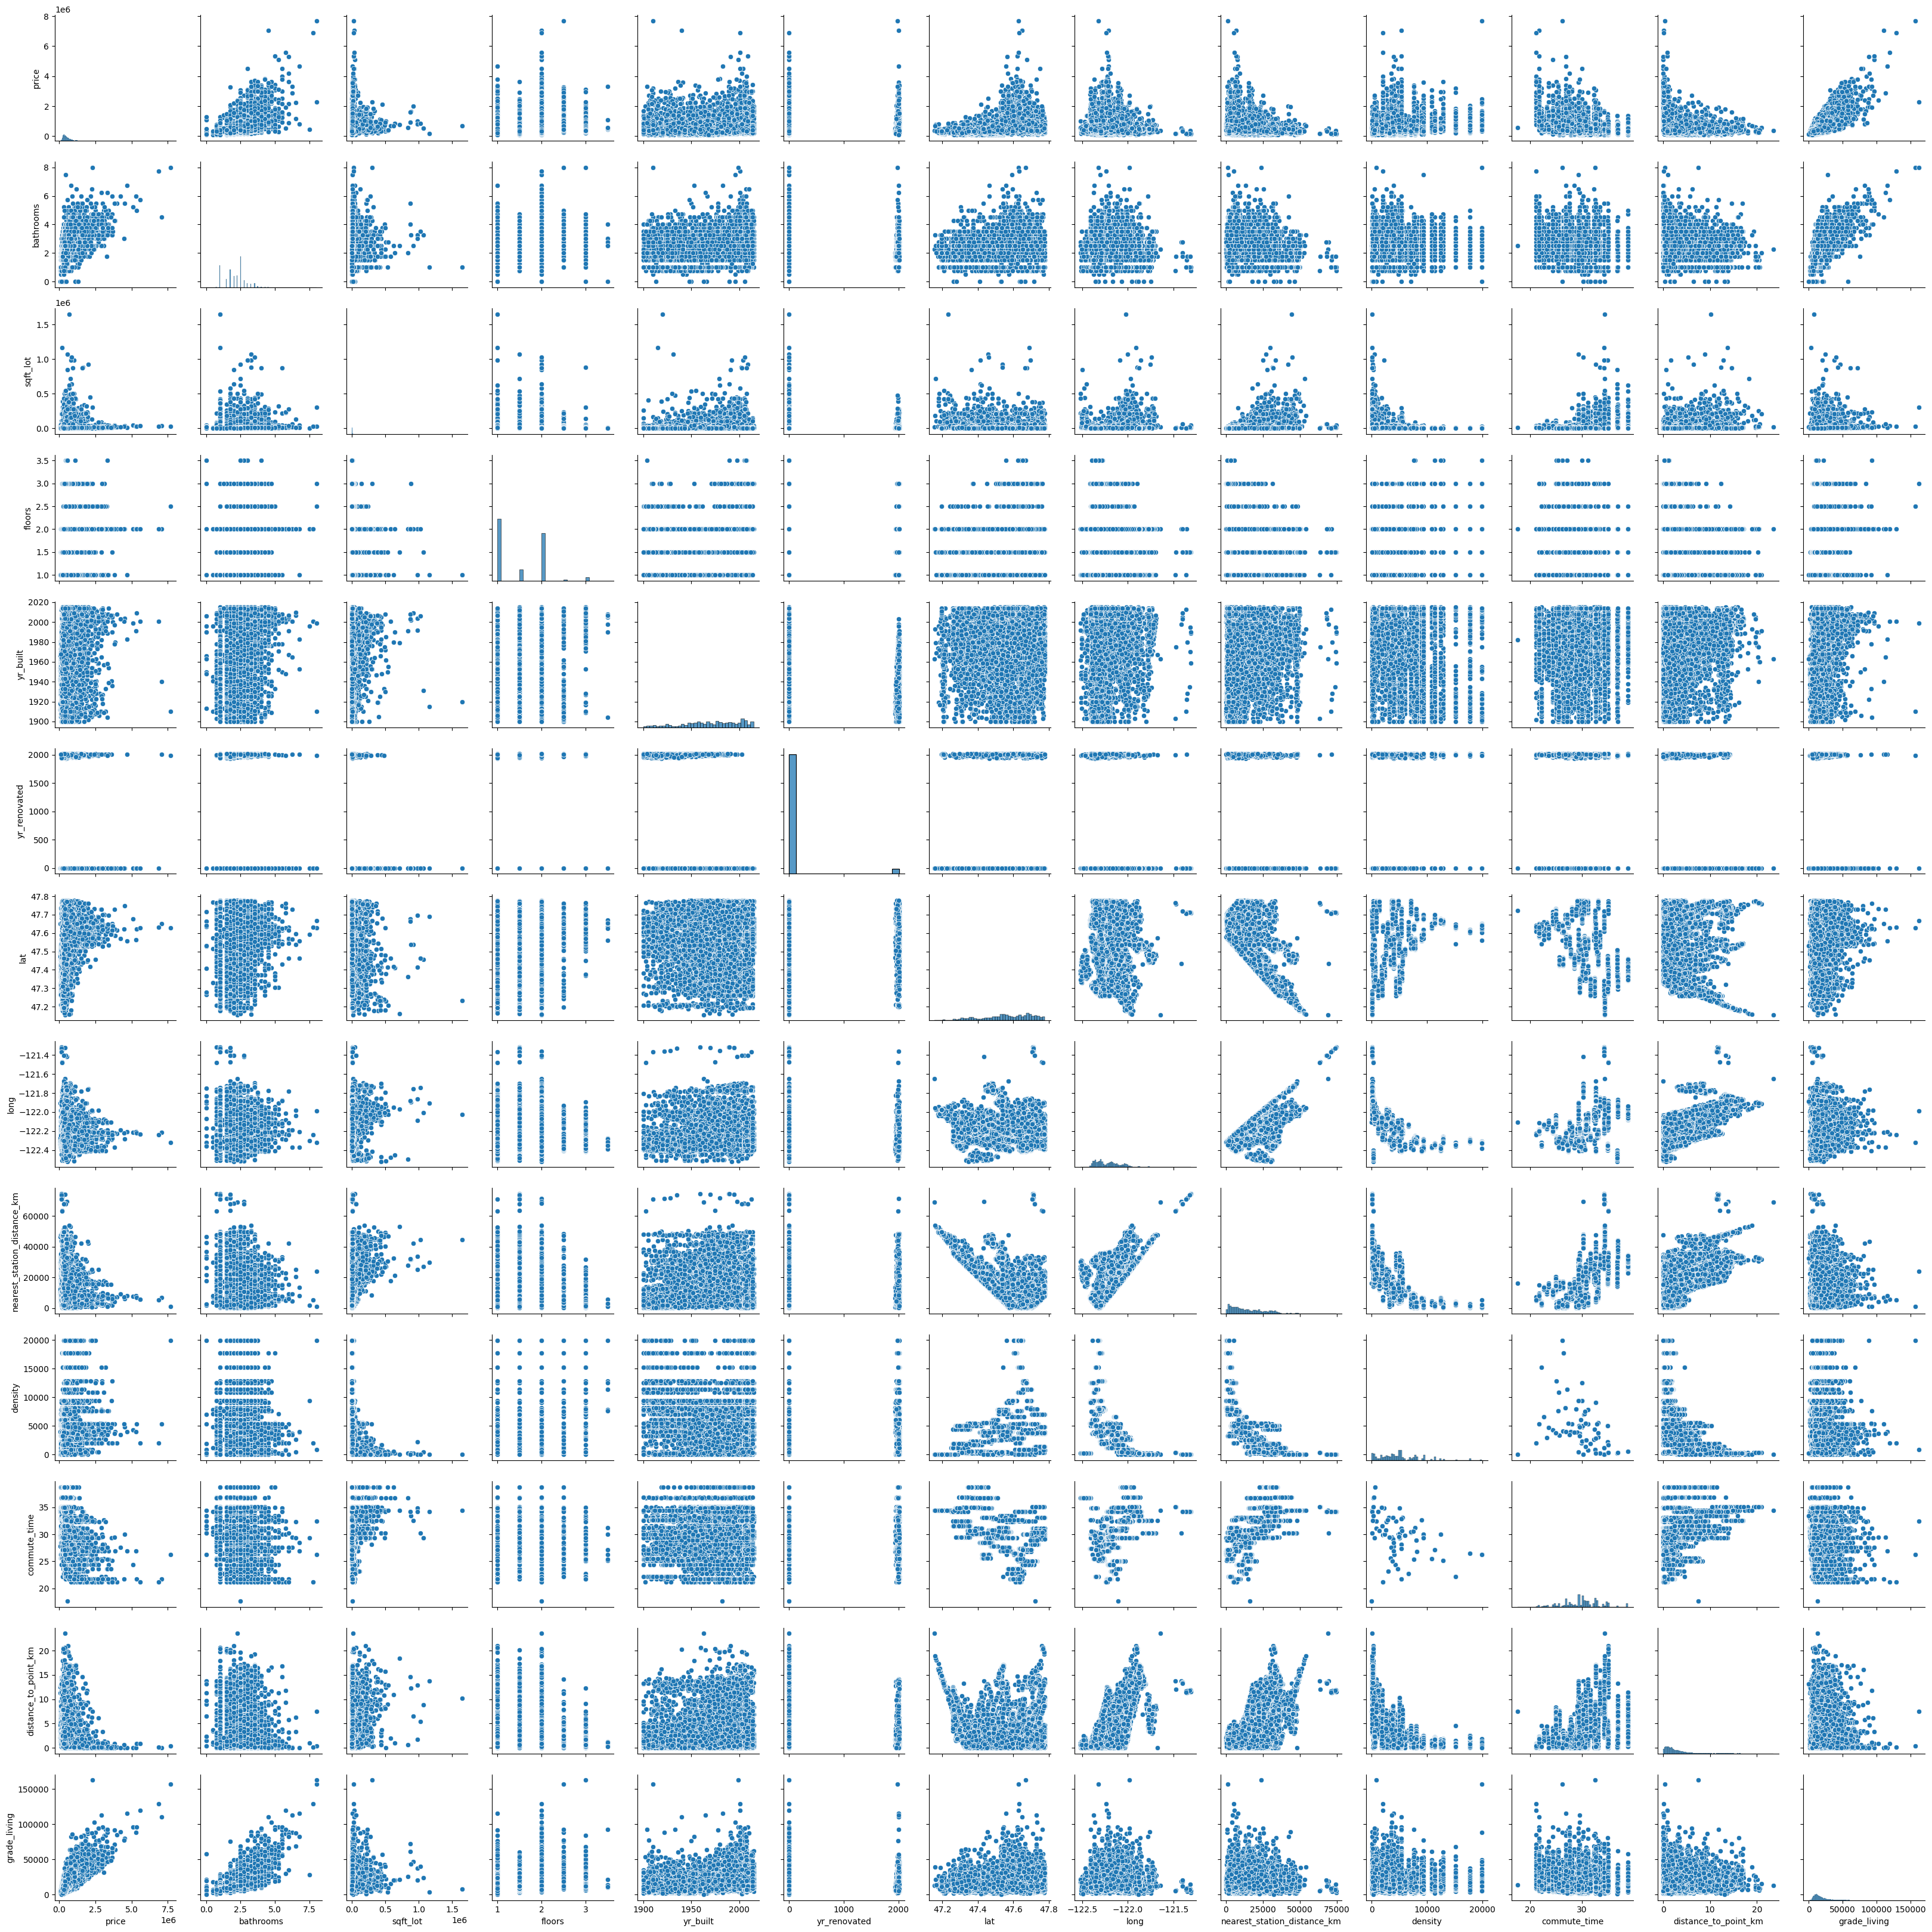

In [71]:
# Select continuous columns
cont_df = df[cont_cols]

# Adjust the figure size as needed
plt.figure(figsize=(20, 10))

# Create pairplot
sns.pairplot(cont_df)

plt.tight_layout()
plt.show()


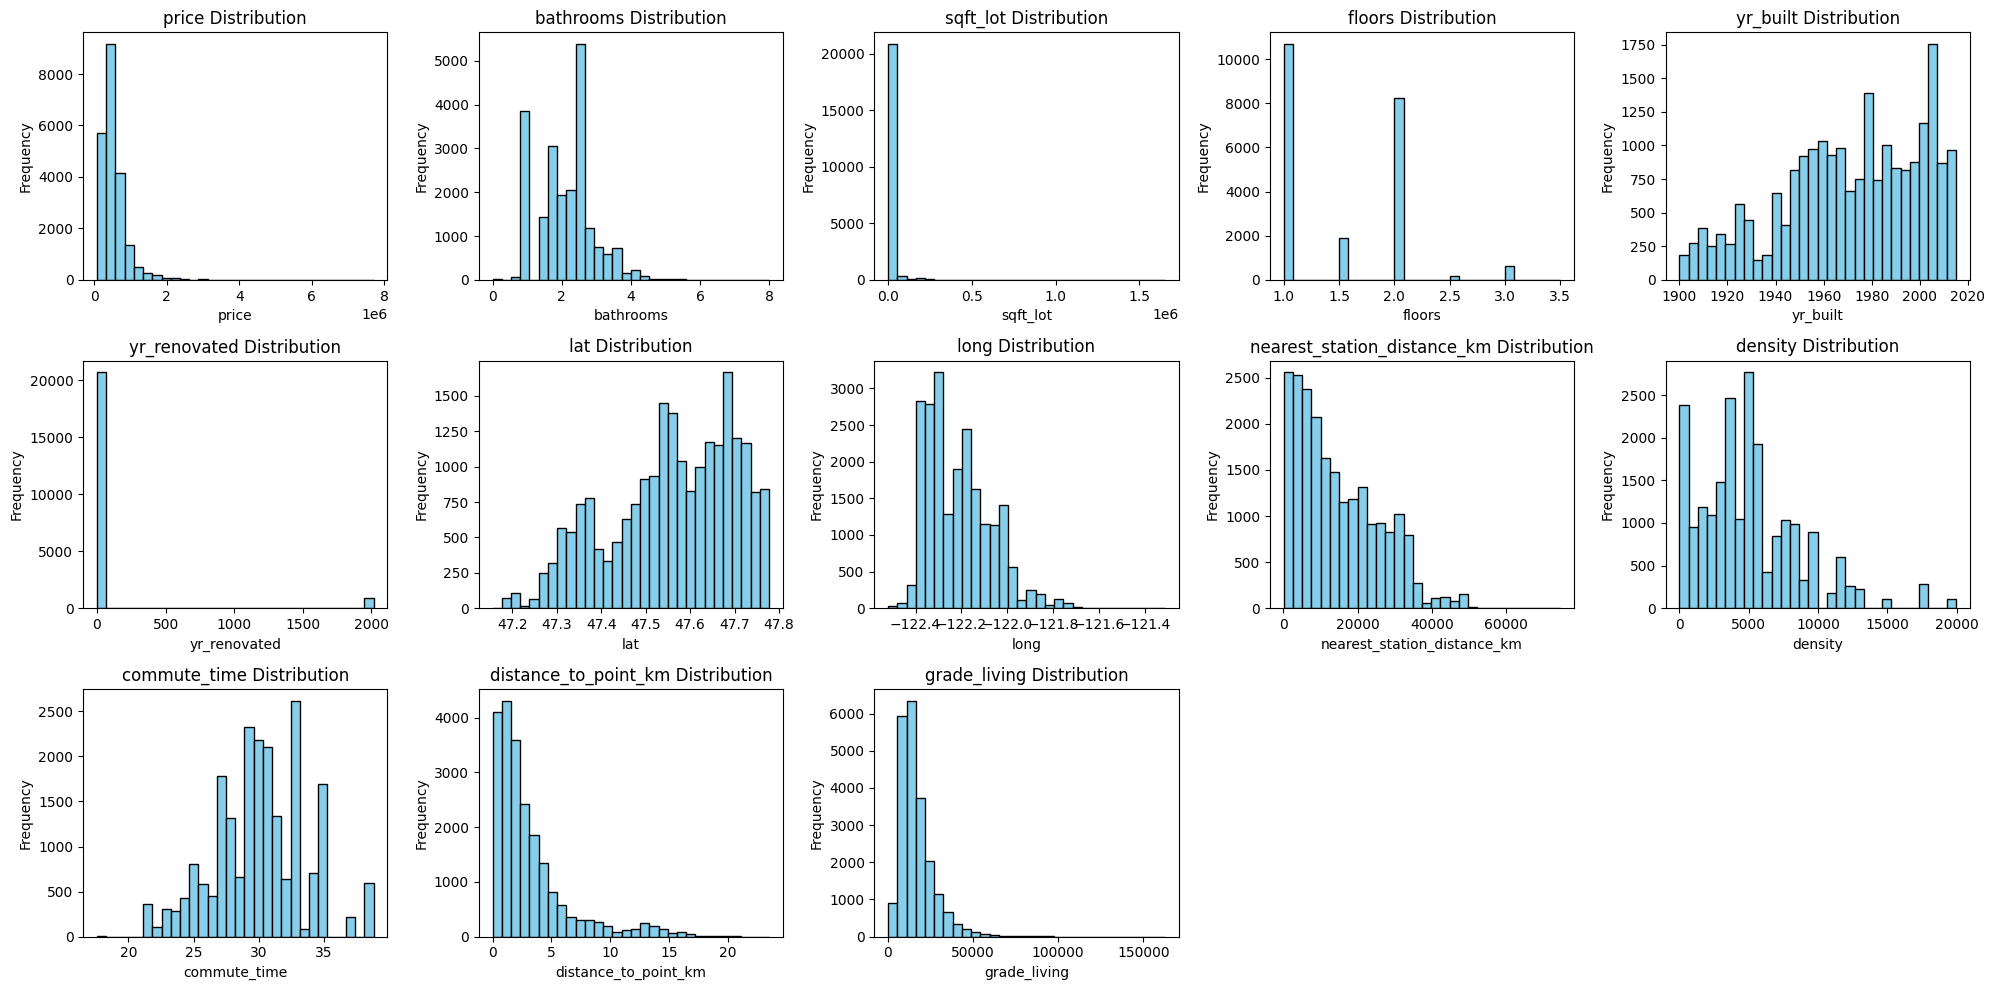

In [72]:

# Adjust the figure size as needed
plt.figure(figsize=(20, 10))

# Loop through each continuous column
for i, col in enumerate(cont_cols, 1):
    plt.subplot(3, 5, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [73]:
import numpy as np
import scipy.stats as stats


In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def plot_transformations(df, column_name):
    # Extract the column data
    data = df[column_name].values.reshape(-1, 1)

    # Create a figure and axis object
    fig, axs = plt.subplots(3, 2, figsize=(10, 6))

    # Plot the original data
    axs[0, 0].hist(data, bins=30, color='skyblue', edgecolor='black')
    axs[0, 0].set_title('Original Distribution')
    axs[0, 0].set_xlabel(column_name)
    axs[0, 0].set_ylabel('Frequency')

    # Logarithmic transformation
    log_transformed = np.log1p(data)
    axs[0, 1].hist(log_transformed, bins=30, color='orange', edgecolor='black')
    axs[0, 1].set_title('Logarithmic Transformation')
    axs[0, 1].set_xlabel('Log-transformed ' + column_name)
    axs[0, 1].set_ylabel('Frequency')

    # Square root transformation
    sqrt_transformed = np.sqrt(data)
    axs[1, 0].hist(sqrt_transformed, bins=30, color='green', edgecolor='black')
    axs[1, 0].set_title('Square Root Transformation')
    axs[1, 0].set_xlabel('Square Root-transformed ' + column_name)
    axs[1, 0].set_ylabel('Frequency')

    # Cube root transformation
    cube_root_transformed = np.cbrt(data)
    axs[1, 1].hist(cube_root_transformed, bins=30, color='red', edgecolor='black')
    axs[1, 1].set_title('Cube Root Transformation')
    axs[1, 1].set_xlabel('Cube Root-transformed ' + column_name)
    axs[1, 1].set_ylabel('Frequency')

    # Standard scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    axs[2, 0].hist(scaled_data, bins=30, color='purple', edgecolor='black')
    axs[2, 0].set_title('Standard Scaled Distribution')
    axs[2, 0].set_xlabel('Standard Scaled ' + column_name)
    axs[2, 0].set_ylabel('Frequency')

    # Min-Max scaling
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    axs[2, 1].hist(scaled_data, bins=30, color='pink', edgecolor='black')
    axs[2, 1].set_title('Min-Max Scaled Distribution')
    axs[2, 1].set_xlabel('Min-Max Scaled ' + column_name)
    axs[2, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()



In [94]:
plot_transformations(df, 'price')

In [95]:
plot_transformations(df, 'sqft_lot')

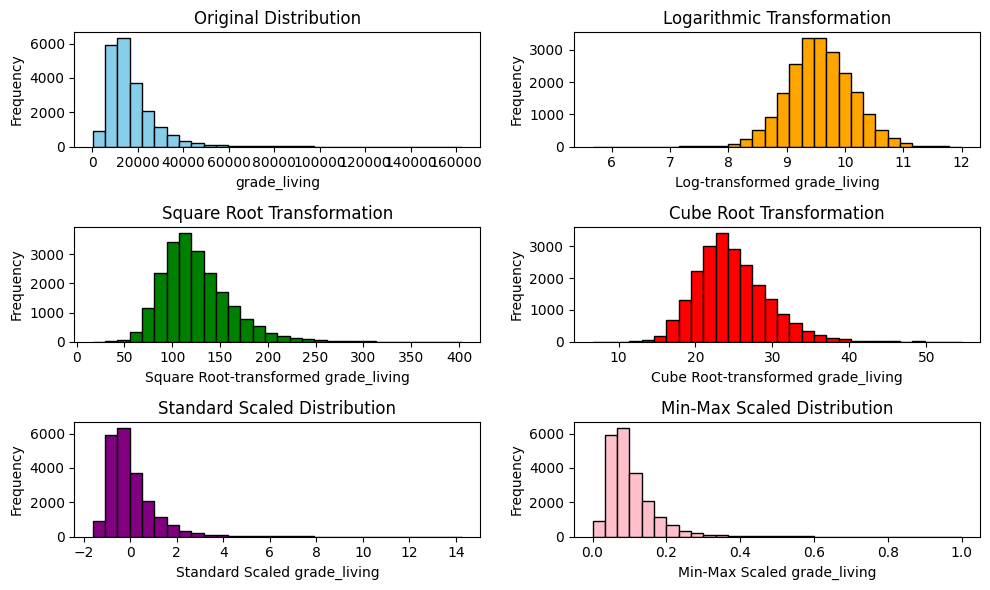

In [96]:
plot_transformations(df, 'grade_living')

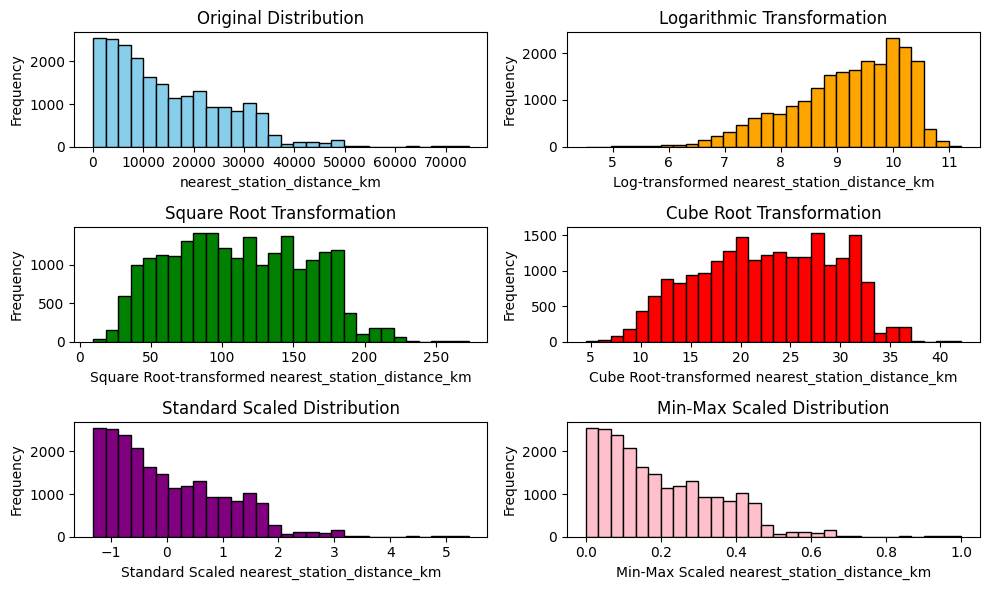

In [97]:
plot_transformations(df, 'nearest_station_distance_km')

In [98]:
plot_transformations(df, 'distance_to_point_km')

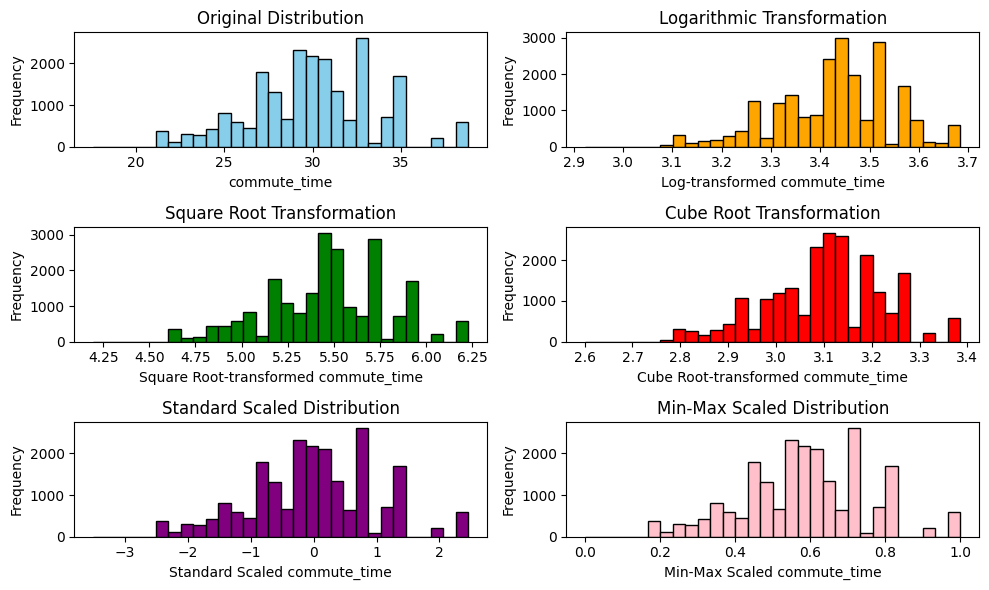

In [99]:
plot_transformations(df, 'commute_time')

In [100]:
plot_transformations(df, 'density')

In [101]:
plot_transformations(df, 'yr_built')

In [83]:
def apply_transformations(df, column_names, methods):
    """
    Apply transformations to specified columns in the DataFrame.

    Parameters:
    - df: DataFrame
    - column_names: List of column names to transform
    - methods: List of transformation methods corresponding to each column
               Valid methods: 'log', 'sqrt', 'cube'

    Returns:
    - transformed_df: DataFrame with transformations applied to specified columns
    """

    transformed_df = df.copy()

    # Iterate over each column name and corresponding method
    for col, method in zip(column_names, methods):
        # Define the transformation function based on the specified method
        if method == 'log':
            transformation_func = np.log1p
        elif method == 'sqrt':
            transformation_func = np.sqrt
        elif method == 'cube':
            transformation_func = np.cbrt
        else:
            raise ValueError(f"Invalid transformation method: {method}")

        # Apply the transformation to the specified column
        transformed_column = transformation_func(transformed_df[col])

        # Update the column in the transformed DataFrame
        transformed_df[col] = transformed_column

    return transformed_df


In [113]:
transformed_df = apply_transformations(df, ['price', 'sqft_lot','grade_living','nearest_station_distance_km','distance_to_point_km','density'], 
                                           ['log','log','log','sqrt','cube','sqrt'])
transformed_df

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      12.309987         3       1.00  8.639588     1.0           0     0   
1      13.195616         3       2.25  8.887791     2.0           0     0   
2      12.100718         2       1.00  9.210440     1.0           0     0   
3      13.311331         4       3.00  8.517393     1.0           0     0   
4      13.142168         3       2.00  8.997271     1.0           0     0   
...          ...       ...        ...       ...     ...         ...   ...   
21608  12.793862         3       2.50  7.031741     3.0           0     0   
21609  12.899222         4       2.50  8.668024     2.0           0     0   
21610  12.904461         2       0.75  7.208600     2.0           0     0   
21611  12.899222         3       2.50  7.778630     2.0           0     0   
21612  12.691584         2       0.75  6.981935     2.0           0     0   

       condition  yr_built  yr_renovated  zipcode      lat     long  \
0              3      1955             0    98178  47.5112 -122.257   
1              3      1951          1991    98125  47.7210 -122.319   
2              3      1933             0    98028  47.7379 -122.233   
3              5      1965             0    98136  47.5208 -122.393   
4              3      1987             0    98074  47.6168 -122.045   
...          ...       ...           ...      ...      ...      ...   
21608          3      2009             0    98103  47.6993 -122.346   
21609          3      2014             0    98146  47.5107 -122.362   
21610          3      2009             0    98144  47.5944 -122.299   
21611          3      2004             0    98027  47.5345 -122.069   
21612          3      2008             0    98144  47.5941 -122.299   

       nearest_station_distance_km     bathroom_category     density  \
0                        92.843967  Studio or 1 Bathroom   73.239334   
1                        45.587071         2-3 Bathrooms   89.437129   
2                        90.053052  Studio or 1 Bathroom   61.911227   
3                        94.436850         2-3 Bathrooms   86.700634   
4                       140.676225         1-2 Bathrooms   53.814496   
...                            ...                   ...         ...   
21608                    37.047496         2-3 Bathrooms  106.728628   
21609                    92.223540         2-3 Bathrooms   77.678826   
21610                    44.070177  Studio or 1 Bathroom   96.896852   
21611                   137.635191         2-3 Bathrooms   22.068076   
21612                    43.741652  Studio or 1 Bathroom   96.896852   

       commute_time  distance_to_point_km  is_near_shore  grade_living  
0              32.9              0.841443          False      9.019301  
1              28.9              1.448408          False      9.797627  
2              33.1              1.323378          False      8.438366  
3              30.6              0.466725           True      9.526683  
4              32.7              1.205222          False      9.506065  
...             ...                   ...            ...           ...  
21608          27.1              1.195465          False      9.412546  
21609          29.8              1.257844          False      9.824498  
21610          29.3              0.960784          False      8.873608  
21611          29.3              1.330289          False      9.457279  
21612          29.3              0.959432          False      8.873608  

[21613 rows x 20 columns]

In [103]:
plot_transformations(transformed_df, 'yr_renovated')

In [114]:
transformed_df['waterfront'] = transformed_df['waterfront'].replace({0: False, 1: True})
transformed_df['is_near_shore'] = transformed_df['waterfront'].replace({0: False, 1: True})
transformed_df['is_renovated'] = transformed_df['yr_renovated'].apply(lambda x: True if x > 0 else False)

transformed_df

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_8608/598885997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_df['waterfront'] = transformed_df['waterfront'].replace({0: False, 1: True})


price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      12.309987         3       1.00  8.639588     1.0       False     0   
1      13.195616         3       2.25  8.887791     2.0       False     0   
2      12.100718         2       1.00  9.210440     1.0       False     0   
3      13.311331         4       3.00  8.517393     1.0       False     0   
4      13.142168         3       2.00  8.997271     1.0       False     0   
...          ...       ...        ...       ...     ...         ...   ...   
21608  12.793862         3       2.50  7.031741     3.0       False     0   
21609  12.899222         4       2.50  8.668024     2.0       False     0   
21610  12.904461         2       0.75  7.208600     2.0       False     0   
21611  12.899222         3       2.50  7.778630     2.0       False     0   
21612  12.691584         2       0.75  6.981935     2.0       False     0   

       condition  yr_built  yr_renovated  zipcode      lat     long  \
0              3      1955             0    98178  47.5112 -122.257   
1              3      1951          1991    98125  47.7210 -122.319   
2              3      1933             0    98028  47.7379 -122.233   
3              5      1965             0    98136  47.5208 -122.393   
4              3      1987             0    98074  47.6168 -122.045   
...          ...       ...           ...      ...      ...      ...   
21608          3      2009             0    98103  47.6993 -122.346   
21609          3      2014             0    98146  47.5107 -122.362   
21610          3      2009             0    98144  47.5944 -122.299   
21611          3      2004             0    98027  47.5345 -122.069   
21612          3      2008             0    98144  47.5941 -122.299   

       nearest_station_distance_km     bathroom_category     density  \
0                        92.843967  Studio or 1 Bathroom   73.239334   
1                        45.587071         2-3 Bathrooms   89.437129   
2                        90.053052  Studio or 1 Bathroom   61.911227   
3                        94.436850         2-3 Bathrooms   86.700634   
4                       140.676225         1-2 Bathrooms   53.814496   
...                            ...                   ...         ...   
21608                    37.047496         2-3 Bathrooms  106.728628   
21609                    92.223540         2-3 Bathrooms   77.678826   
21610                    44.070177  Studio or 1 Bathroom   96.896852   
21611                   137.635191         2-3 Bathrooms   22.068076   
21612                    43.741652  Studio or 1 Bathroom   96.896852   

       commute_time  distance_to_point_km  is_near_shore  grade_living  \
0              32.9              0.841443          False      9.019301   
1              28.9              1.448408          False      9.797627   
2              33.1              1.323378          False      8.438366   
3              30.6              0.466725          False      9.526683   
4              32.7              1.205222          False      9.506065   
...             ...                   ...            ...           ...   
21608          27.1              1.195465          False      9.412546   
21609          29.8              1.257844          False      9.824498   
21610          29.3              0.960784          False      8.873608   
21611          29.3              1.330289          False      9.457279   
21612          29.3              0.959432          False      8.873608   

       is_renovated  
0             False  
1              True  
2             False  
3             False  
4             False  
...             ...  
21608         False  
21609         False  
21610         False  
21611         False  
21612         False  

[21613 rows x 21 columns]

In [116]:
encode_cols2 = ['bedrooms','floors','view','condition','zipcode','bathroom_category']
# Assuming df is the DataFrame and cat_cols contains the list of categorical columns
encoded_df = pd.get_dummies(transformed_df, columns=encode_cols2)
encoded_df


price  bathrooms  sqft_lot  waterfront  yr_built  yr_renovated  \
0      12.309987       1.00  8.639588       False      1955             0   
1      13.195616       2.25  8.887791       False      1951          1991   
2      12.100718       1.00  9.210440       False      1933             0   
3      13.311331       3.00  8.517393       False      1965             0   
4      13.142168       2.00  8.997271       False      1987             0   
...          ...        ...       ...         ...       ...           ...   
21608  12.793862       2.50  7.031741       False      2009             0   
21609  12.899222       2.50  8.668024       False      2014             0   
21610  12.904461       0.75  7.208600       False      2009             0   
21611  12.899222       2.50  7.778630       False      2004             0   
21612  12.691584       0.75  6.981935       False      2008             0   

           lat     long  nearest_station_distance_km     density  \
0      47.5112 -122.257                    92.843967   73.239334   
1      47.7210 -122.319                    45.587071   89.437129   
2      47.7379 -122.233                    90.053052   61.911227   
3      47.5208 -122.393                    94.436850   86.700634   
4      47.6168 -122.045                   140.676225   53.814496   
...        ...      ...                          ...         ...   
21608  47.6993 -122.346                    37.047496  106.728628   
21609  47.5107 -122.362                    92.223540   77.678826   
21610  47.5944 -122.299                    44.070177   96.896852   
21611  47.5345 -122.069                   137.635191   22.068076   
21612  47.5941 -122.299                    43.741652   96.896852   

       commute_time  distance_to_point_km  is_near_shore  grade_living  \
0              32.9              0.841443          False      9.019301   
1              28.9              1.448408          False      9.797627   
2              33.1              1.323378          False      8.438366   
3              30.6              0.466725          False      9.526683   
4              32.7              1.205222          False      9.506065   
...             ...                   ...            ...           ...   
21608          27.1              1.195465          False      9.412546   
21609          29.8              1.257844          False      9.824498   
21610          29.3              0.960784          False      8.873608   
21611          29.3              1.330289          False      9.457279   
21612          29.3              0.959432          False      8.873608   

       is_renovated  bedrooms_0  bedrooms_1  bedrooms_2  bedrooms_3  \
0             False       False       False       False        True   
1              True       False       False       False        True   
2             False       False       False        True       False   
3             False       False       False       False       False   
4             False       False       False       False        True   
...             ...         ...         ...         ...         ...   
21608         False       False       False       False        True   
21609         False       False       False       False       False   
21610         False       False       False        True       False   
21611         False       False       False       False        True   
21612         False       False       False        True       False   

       bedrooms_4  bedrooms_5  bedrooms_6  bedrooms_7  bedrooms_8  bedrooms_9  \
0           False       False       False       False       False       False   
1           False       False       False       False       False       False   
2           False       False       False       False       False       False   
3            True       False       False       False       False       False   
4           False       False       False       False       False       False   
...           ...         ...         ...

In [121]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (replace this with your actual data)
X = encoded_df.drop(columns=['price','bathrooms','yr_renovated'])
y = encoded_df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the LassoCV model
lasso_cv = LassoCV()

# Define a range of cross-validation parameters to search
param_grid = {'cv': [1,2,3,4,5,6]}  # Adjust the range as needed

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso_cv, param_grid=param_grid, cv=5)
grid_search.fit(X_scaled, y)

# Print the best cross-validation parameter
print("Best Cross-Validation Parameter for Lasso:", grid_search.best_params_['cv'])


/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    v

Best Cross-Validation Parameter for Lasso: 3


In [124]:
# Define the LassoCV model with the best cross-validation parameter
lasso_cv = LassoCV(cv=3)  # Use the best cross-validation parameter (3 in this case)

# Fit LassoCV to select features
lasso_cv.fit(X_scaled, y)

# Apply feature selection using selected features
feature_selector = SelectFromModel(lasso_cv, prefit=True)
X_selected = feature_selector.transform(X_scaled)

In [129]:
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, explained_variance_score
import numpy as np

# Define the SparsePCA model
sparse_pca = SparsePCA()

# Define a grid of parameters to search
param_grid_refined = {'n_components': [3, 4, 5, 6, 7], 'alpha': [0.05, 0.1, 0.15]} 

# Define scoring function using explained variance ratio
scorer = make_scorer(explained_variance_score)

# Perform grid search
grid_search_sparse_pca = GridSearchCV(estimator=sparse_pca, param_grid=param_grid, cv=5, scoring=scorer,n_jobs=-1)
grid_search_sparse_pca.fit(X_selected)

# Print the best parameters
print("Best Parameters for Sparse PCA:", grid_search_sparse_pca.best_params_)


/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score

Best Parameters for Sparse PCA: {'alpha': 0.1, 'n_components': 5}


In [130]:
from sklearn.decomposition import SparsePCA

# Define Sparse PCA with best parameters
sparse_pca_best = SparsePCA(n_components=5, alpha=0.1)

# Fit Sparse PCA on the selected features
X_sparse_pca_best = sparse_pca_best.fit_transform(X_selected)


In [133]:
# Compute explained variance ratio
explained_variance = np.var(X_sparse_pca_best, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Print explained variance ratio
print("Explained Variance Ratio of Principal Components:")
print(explained_variance_ratio)

total_explained_variance_ratio = np.sum(explained_variance_ratio)
print("Total Explained Variance Ratio:", total_explained_variance_ratio)


Explained Variance Ratio of Principal Components:
[0.30672063 0.21217461 0.18315497 0.16316502 0.13478478]
Total Explained Variance Ratio: 1.0


In [135]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a range of cluster numbers to search
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5, 6,7,8,9,10]}  # Adjust the range as needed

# Perform grid search for K-means
grid_search_kmeans = GridSearchCV(estimator=KMeans(), param_grid=param_grid_kmeans, cv=5)
grid_search_kmeans.fit(X_sparse_pca_best)

# Get the best number of clusters
best_n_clusters = grid_search_kmeans.best_params_['n_clusters']

# Elbow Method
wcss = []
for n_clusters in param_grid_kmeans['n_clusters']:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_sparse_pca_best)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(param_grid_kmeans['n_clusters'], wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')

# Annotate the plot with the best cluster
plt.annotate(f'Best Cluster: {best_n_clusters}', 
             xy=(best_n_clusters, wcss[param_grid_kmeans['n_clusters'].index(best_n_clusters)]),
             xytext=(best_n_clusters + 0.5, wcss[param_grid_kmeans['n_clusters'].index(best_n_clusters)] + 100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

# Silhouette Score
kmeans_best = KMeans(n_clusters=best_n_clusters)
kmeans_best.fit(X_sparse_pca_best)
silhouette_avg = silhouette_score(X_sparse_pca_best, kmeans_best.labels_)

print("Best Number of Clusters:", best_n_clusters)
print("Silhouette Score:", silhouette_avg)


Best Number of Clusters: 10
Silhouette Score: 0.2710002038583227


In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit K-means with 1 cluster
kmeans_single_cluster = KMeans(n_clusters=3)
kmeans_single_cluster.fit(X_sparse_pca_best)

# Compute silhouette score
silhouette_avg = silhouette_score(X_sparse_pca_best, kmeans_single_cluster.labels_)

print("Silhouette Score for  Cluster:", silhouette_avg)


Silhouette Score for 1 Cluster: 0.2326357651008969


In [146]:
from sklearn.metrics import silhouette_score

# Define a function to compute silhouette score
def compute_silhouette_score(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        return silhouette_score(X, labels)
    else:
        return 0

# Perform grid search with silhouette score as scoring metric
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, cv=5, scoring=compute_silhouette_score, n_jobs=-1)
grid_search.fit(X_sparse_pca_best)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_dbscan = grid_search.best_estimator_

# Fit DBSCAN with the best parameters
best_dbscan.fit(X_sparse_pca_best)


DBSCAN(eps=0.1, min_samples=10)

In [148]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Predict cluster labels
cluster_labels = best_dbscan.fit_predict(X_sparse_pca_best)

# Compute silhouette score
silhouette = silhouette_score(X_sparse_pca_best, cluster_labels)

# Compute Davies-Bouldin index

print("Silhouette Score:", silhouette)


Silhouette Score: -0.2726604889923914


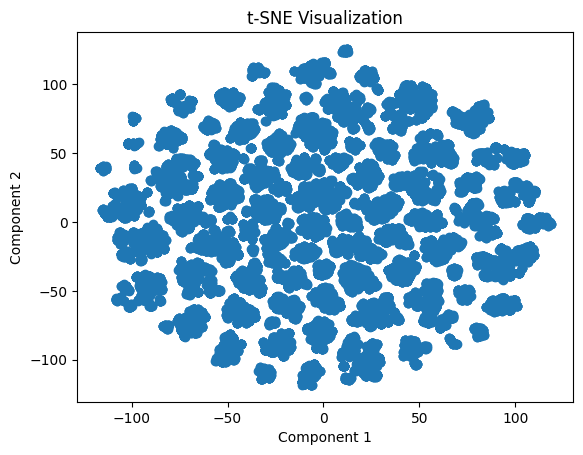

In [149]:
from sklearn.manifold import TSNE

# Assuming X_sparse_pca_best is the transformed data from the previous cell
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


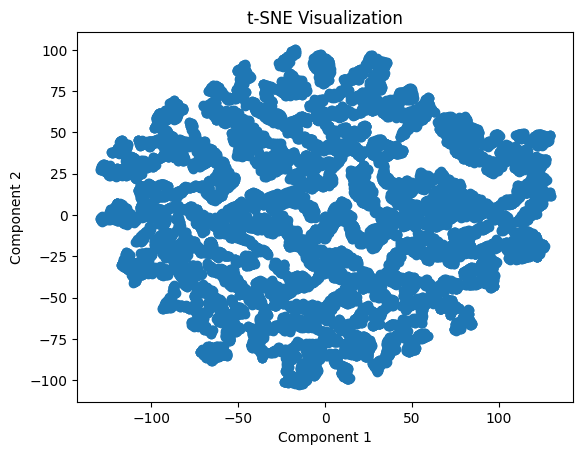

In [155]:
from sklearn.manifold import TSNE

X_subset = encoded_df[['price','grade_living']]

# Standardize the features
scaler = StandardScaler()
X_subset_scaled = scaler.fit_transform(X_subset)


# Assuming X_sparse_pca_best is the transformed data from the previous cell
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset_scaled)

# Plot the t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


## clustering with 2 columns

In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def kmeans_clustering_analysis(X, param_grid_kmeans={'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]}):
    """
    Perform K-means clustering analysis on the input data.

    Parameters:
    X (DataFrame): Input data to be clustered.
    param_grid_kmeans (dict): Parameter grid for number of clusters in K-means.

    Returns:
    best_n_clusters (int): The best number of clusters based on grid search.
    silhouette_avg (float): The average silhouette score for the best number of clusters.
    """
    # Perform grid search for K-means
    grid_search_kmeans = GridSearchCV(estimator=KMeans(), param_grid=param_grid_kmeans, cv=5)
    grid_search_kmeans.fit(X)

    # Get the best number of clusters
    best_n_clusters = grid_search_kmeans.best_params_['n_clusters']

    # Elbow Method
    wcss = []
    for n_clusters in param_grid_kmeans['n_clusters']:
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow curve
    plt.figure(figsize=(5, 3))
    plt.plot(param_grid_kmeans['n_clusters'], wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-cluster Sum of Squares (WCSS)')

    # Annotate the plot with the best cluster
    plt.annotate(f'Best Cluster: {best_n_clusters}', 
                 xy=(best_n_clusters, wcss[param_grid_kmeans['n_clusters'].index(best_n_clusters)]),
                 xytext=(best_n_clusters + 0.5, wcss[param_grid_kmeans['n_clusters'].index(best_n_clusters)] + 100),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.show()

    # Silhouette Score
    kmeans_best = KMeans(n_clusters=best_n_clusters)
    kmeans_best.fit(X)
    silhouette_avg = silhouette_score(X, kmeans_best.labels_)

    print("Best Number of Clusters:", best_n_clusters)
    print("Silhouette Score:", silhouette_avg)

    return best_n_clusters, silhouette_avg

# Example usage
# X_subset_grade = encoded_df[['grade_living']]
# best_n_clusters, silhouette_avg = kmeans_clustering_analysis


In [167]:
X_subset_grade = encoded_df[['price','grade_living']]
# Standardize the features
scaler = StandardScaler()
X_subset_grade_scaled = scaler.fit_transform(X_subset_grade)

kmeans_clustering_analysis(X_subset_grade)
kmeans_clustering_analysis(X_subset_grade_scaled)


Best Number of Clusters: 10
Silhouette Score: 0.32616678857072223


Best Number of Clusters: 10
Silhouette Score: 0.32051379880239494


(10, 0.32051379880239494)

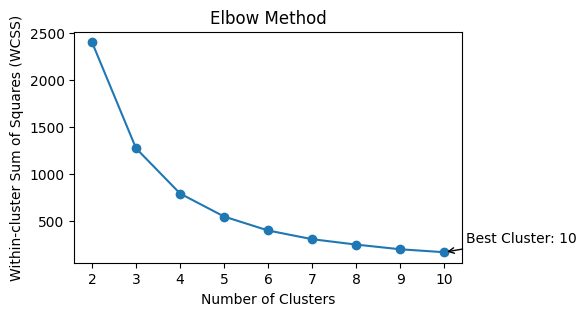

Best Number of Clusters: 10
Silhouette Score: 0.5146670414263123


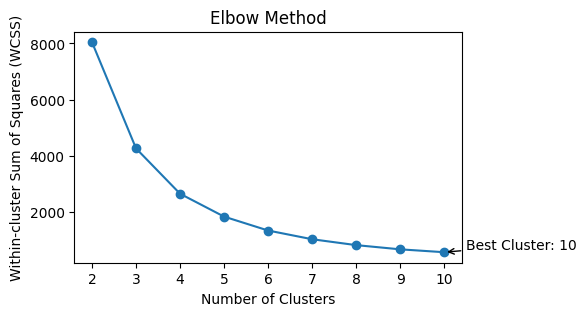

Best Number of Clusters: 10
Silhouette Score: 0.5192830118277922


(10, 0.5192830118277922)

In [163]:
X_subset_grade = encoded_df[['grade_living']]
# Standardize the features
scaler = StandardScaler()
X_subset_grade_scaled = scaler.fit_transform(X_subset_grade)

kmeans_clustering_analysis(X_subset_grade)
kmeans_clustering_analysis(X_subset_grade_scaled)


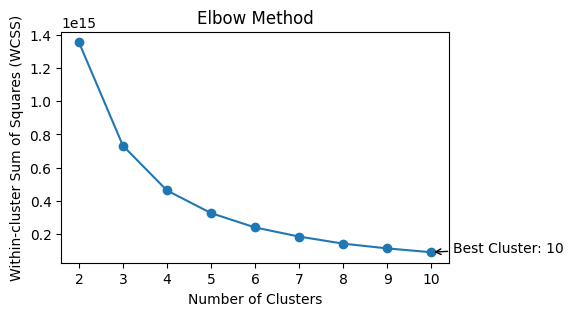

Best Number of Clusters: 10
Silhouette Score: 0.524987050947165


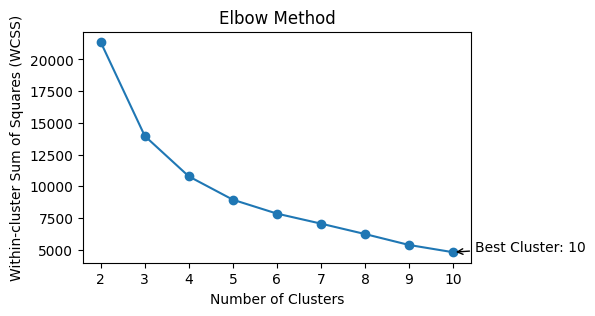

Best Number of Clusters: 10
Silhouette Score: 0.3585962429127074


(10, 0.3585962429127074)

In [164]:
df_subset = df[['price','grade_living']]

# Standardize the features
scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset)

kmeans_clustering_analysis(df_subset)
kmeans_clustering_analysis(df_subset_scaled)

In [173]:
def dbscan_clustering_analysis(X, param_grid_dbscan={'eps': [0.1, 0.5, 1.0], 'min_samples': [5, 10, 15]}):
    # Define silhouette score as the scoring method
    silhouette_scorer = make_scorer(silhouette_score)

    # Perform grid search for DBSCAN
    grid_search_dbscan = GridSearchCV(estimator=DBSCAN(), param_grid=param_grid_dbscan, scoring=silhouette_scorer, cv=5)
    grid_search_dbscan.fit(X)

    # Get the best parameters
    best_params = grid_search_dbscan.best_params_

    # Fit DBSCAN with the best parameters
    dbscan_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    cluster_labels = dbscan_best.fit_predict(X)

    # Check if all samples are assigned to the same cluster
    if len(set(cluster_labels)) == 1:
        print("DBSCAN failed to identify multiple clusters.")
        return None, None

    # Compute silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    print("Best Parameters for DBSCAN:", best_params)
    print("Silhouette Score:", silhouette_avg)

    return best_params, silhouette_avg


In [171]:
df

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21608  360000.0         3       2.50      1131     3.0           0     0   
21609  400000.0         4       2.50      5813     2.0           0     0   
21610  402101.0         2       0.75      1350     2.0           0     0   
21611  400000.0         3       2.50      2388     2.0           0     0   
21612  325000.0         2       0.75      1076     2.0           0     0   

       condition  yr_built  yr_renovated  zipcode      lat     long  \
0              3      1955             0    98178  47.5112 -122.257   
1              3      1951          1991    98125  47.7210 -122.319   
2              3      1933             0    98028  47.7379 -122.233   
3              5      1965             0    98136  47.5208 -122.393   
4              3      1987             0    98074  47.6168 -122.045   
...          ...       ...           ...      ...      ...      ...   
21608          3      2009             0    98103  47.6993 -122.346   
21609          3      2014             0    98146  47.5107 -122.362   
21610          3      2009             0    98144  47.5944 -122.299   
21611          3      2004             0    98027  47.5345 -122.069   
21612          3      2008             0    98144  47.5941 -122.299   

       nearest_station_distance_km     bathroom_category  density  \
0                      8620.002287  Studio or 1 Bathroom   5364.0   
1                      2078.181042         2-3 Bathrooms   7999.0   
2                      8109.552186  Studio or 1 Bathroom   3833.0   
3                      8918.318639         2-3 Bathrooms   7517.0   
4                     19789.800401         1-2 Bathrooms   2896.0   
...                            ...                   ...      ...   
21608                  1372.516972         2-3 Bathrooms  11391.0   
21609                  8505.181320         2-3 Bathrooms   6034.0   
21610                  1942.180508  Studio or 1 Bathroom   9389.0   
21611                 18943.445917         2-3 Bathrooms    487.0   
21612                  1913.332127  Studio or 1 Bathroom   9389.0   

       commute_time  distance_to_point_km  is_near_shore  grade_living  
0              32.9              0.595763          False          8260  
1              28.9              3.038596          False         17990  
2              33.1              2.317669          False          4620  
3              30.6              0.101668           True         13720  
4              32.7              1.750656          False         13440  
...             ...                   ...            ...           ...  
21608          27.1              1.708484          False         12240  
21609          29.8              1.990125          False         18480  
21610          29.3              0.886906          False          7140  
21611          29.3              2.354171          False         12800  
21612          29.3              0.883168          False          7140  

[21613 rows x 20 columns]

In [174]:
X_subset2 = df[['price','grade_living','lat','sqft_lot']]

# Standardize the features
scaler = StandardScaler()
X_subset2_scaled = scaler.fit_transform(X_subset2)

dbscan_clustering_analysis(X_subset2)
dbscan_clustering_analysis(X_subset2_scaled)

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score

DBSCAN failed to identify multiple clusters.


/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score

Best Parameters for DBSCAN: {'eps': 0.1, 'min_samples': 5}
Silhouette Score: -0.6606667460267107


({'eps': 0.1, 'min_samples': 5}, -0.6606667460267107)

In [168]:


dbscan_clustering_analysis(X_subset_grade)
dbscan_clustering_analysis(X_subset_grade_scaled)

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score

Best Parameters for DBSCAN: {'eps': 0.1, 'min_samples': 5}
Silhouette Score: 0.43168266039198894


/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 980, in _score

Best Parameters for DBSCAN: {'eps': 0.1, 'min_samples': 5}
Silhouette Score: -0.2207822466090158


({'eps': 0.1, 'min_samples': 5}, -0.2207822466090158)

# non scaling

In [175]:
df5 = pd.read_csv('../cleaned_data_v2.csv')

In [176]:
df5

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21608  360000.0         3       2.50      1131     3.0           0     0   
21609  400000.0         4       2.50      5813     2.0           0     0   
21610  402101.0         2       0.75      1350     2.0           0     0   
21611  400000.0         3       2.50      2388     2.0           0     0   
21612  325000.0         2       0.75      1076     2.0           0     0   

       condition  yr_built  yr_renovated  zipcode      lat     long  \
0              3      1955             0    98178  47.5112 -122.257   
1              3      1951          1991    98125  47.7210 -122.319   
2              3      1933             0    98028  47.7379 -122.233   
3              5      1965             0    98136  47.5208 -122.393   
4              3      1987             0    98074  47.6168 -122.045   
...          ...       ...           ...      ...      ...      ...   
21608          3      2009             0    98103  47.6993 -122.346   
21609          3      2014             0    98146  47.5107 -122.362   
21610          3      2009             0    98144  47.5944 -122.299   
21611          3      2004             0    98027  47.5345 -122.069   
21612          3      2008             0    98144  47.5941 -122.299   

       nearest_station_distance_km     bathroom_category  density  \
0                      8620.002287  Studio or 1 Bathroom   5364.0   
1                      2078.181042         2-3 Bathrooms   7999.0   
2                      8109.552186  Studio or 1 Bathroom   3833.0   
3                      8918.318639         2-3 Bathrooms   7517.0   
4                     19789.800401         1-2 Bathrooms   2896.0   
...                            ...                   ...      ...   
21608                  1372.516972         2-3 Bathrooms  11391.0   
21609                  8505.181320         2-3 Bathrooms   6034.0   
21610                  1942.180508  Studio or 1 Bathroom   9389.0   
21611                 18943.445917         2-3 Bathrooms    487.0   
21612                  1913.332127  Studio or 1 Bathroom   9389.0   

       commute_time  distance_to_point_km  is_near_shore  grade_living  
0              32.9              0.595763          False          8260  
1              28.9              3.038596          False         17990  
2              33.1              2.317669          False          4620  
3              30.6              0.101668           True         13720  
4              32.7              1.750656          False         13440  
...             ...                   ...            ...           ...  
21608          27.1              1.708484          False         12240  
21609          29.8              1.990125          False         18480  
21610          29.3              0.886906          False          7140  
21611          29.3              2.354171          False         12800  
21612          29.3              0.883168          False          7140  

[21613 rows x 20 columns]

In [177]:
df5.drop(columns=['bathroom_category'], inplace=True)

In [178]:
df5 = pd.get_dummies(df5, columns=['floors','view','condition','zipcode'])

In [179]:
from sklearn.decomposition import PCA

# Separate features
X = df5.drop('price', axis=1)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the 'price' column back to the DataFrame
df_pca['price'] = df5['price']

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[8.82967405e-01 6.26030078e-02 5.12765378e-02 3.07106930e-03
 8.16704436e-05 3.00904153e-07 4.17221983e-09 3.03056250e-09
 3.42491716e-10 1.76840580e-10 1.40243731e-10 9.17498201e-11
 6.22002792e-11 5.21962132e-11 4.95446109e-11 3.47755862e-11
 1.63421076e-11 1.57230204e-11 1.39959902e-11 1.36130708e-11
 1.31593965e-11 1.30534655e-11 1.28462102e-11 1.24538690e-11
 1.18347017e-11 1.16987735e-11 1.15914904e-11 1.12204034e-11
 1.10004491e-11 1.07418255e-11 1.06783436e-11 1.01501903e-11
 1.00914535e-11 1.00210781e-11 9.76954516e-12 9.56250607e-12
 9.35252383e-12 9.17188934e-12 8.97935220e-12 8.62007727e-12
 8.53165016e-12 8.38731794e-12 8.18402424e-12 7.97533828e-12
 7.83263430e-12 7.61746970e-12 7.52382827e-12 7.30743184e-12
 7.12285131e-12 7.00199707e-12 6.97401383e-12 6.74787535e-12
 6.69026105e-12 6.58083690e-12 6.52074746e-12 6.42930527e-12
 6.41515272e-12 6.36887705e-12 6.29973365e-12 6.19496066e-12
 6.15030316e-12 6.12998154e-12 6.07098024e-12 5.98503805e-1

In [180]:
df_pca.drop(columns=['price'],inplace=True)

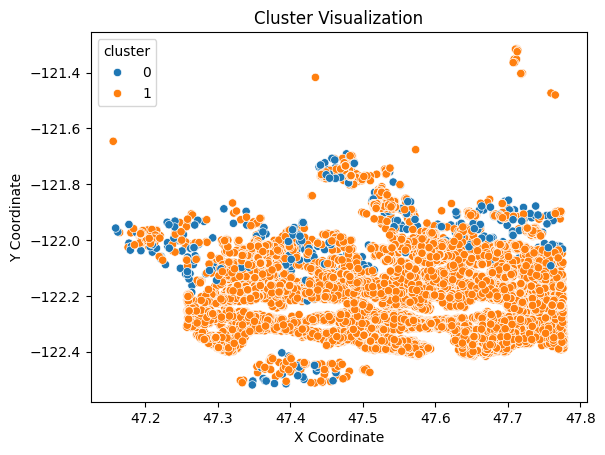

The silhouette score is: 0.9028746687747354


In [182]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features
# Drop the 'price' column
X_first_3_columns = df_pca.iloc[:, :3]

X_scaled = X_first_3_columns

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df5['cluster'] = clusters


# Create a scatter plot
sns.scatterplot(data=df, x='lat', y='long', hue='cluster')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Cluster Visualization')

# Show the plot
plt.show()

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)

# Print the silhouette score
print("The silhouette score is:", silhouette_avg)


In [183]:
df5['cluster'].value_counts()

cluster
1    21268
0      345
Name: count, dtype: int64

## remove outliers from price than reapply

In [184]:
df6 = pd.read_csv('../cleaned_data_v2.csv')

In [185]:
# Calculate the z-score for the 'price' column
z_scores = (df6['price'] - df6['price'].mean()) / df6['price'].std()

# Define a threshold for outliers (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Remove outliers based on the threshold
df6 = df6[(z_scores < threshold) & (z_scores > -threshold)]


In [188]:
df6.drop(columns=['bathroom_category'], inplace=True)

In [191]:
df6 = pd.get_dummies(df6, columns=['floors','view','condition','zipcode'])

In [192]:
from sklearn.decomposition import PCA

# Separate features
X = df6.drop('price', axis=1)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA components
df_pca_outlier = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the 'price' column back to the DataFrame
df_pca_outlier['price'] = df6['price']

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[8.88944971e-01 6.69480800e-02 4.08132679e-02 3.21103754e-03
 8.23237273e-05 3.10840684e-07 4.39137759e-09 3.19638883e-09
 3.49252213e-10 1.86357529e-10 1.47548976e-10 9.50069865e-11
 6.28257718e-11 5.50341082e-11 5.18518311e-11 3.55554676e-11
 1.71938748e-11 1.56360577e-11 1.48356242e-11 1.45994634e-11
 1.40720013e-11 1.40017702e-11 1.37478643e-11 1.32744705e-11
 1.26927802e-11 1.24535603e-11 1.23273508e-11 1.18116206e-11
 1.16562935e-11 1.13905844e-11 1.12256669e-11 1.08133554e-11
 1.06800113e-11 1.03739840e-11 1.01724779e-11 9.97935120e-12
 9.76738233e-12 9.40276645e-12 9.27639485e-12 9.06340048e-12
 8.98223475e-12 8.79825300e-12 8.38338373e-12 8.31922952e-12
 8.07295702e-12 7.89363684e-12 7.78467838e-12 7.65667180e-12
 7.47815443e-12 7.26251638e-12 7.18161236e-12 7.12896101e-12
 7.00765988e-12 6.90369021e-12 6.87696798e-12 6.77927783e-12
 6.68262163e-12 6.65244695e-12 6.54711371e-12 6.51767806e-12
 6.39759006e-12 6.30421626e-12 6.16524380e-12 6.02317915e-1

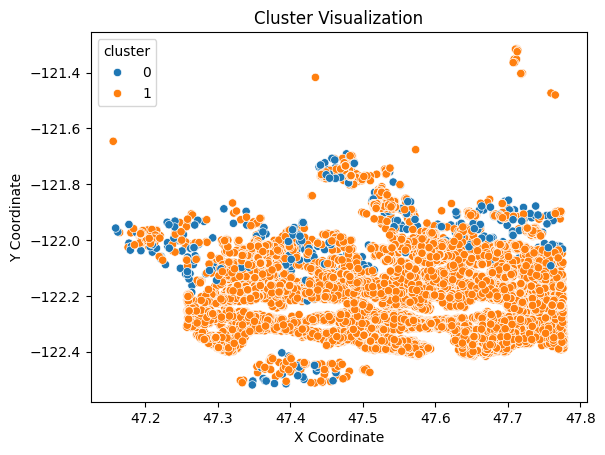

The silhouette score is: 0.9042535228824897


In [193]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features
# Drop the 'price' column
X_first_3_columns = df_pca_outlier.iloc[:, :3]

X_scaled = X_first_3_columns

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df6['cluster'] = clusters


# Create a scatter plot
sns.scatterplot(data=df, x='lat', y='long', hue='cluster')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Cluster Visualization')

# Show the plot
plt.show()

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)

# Print the silhouette score
print("The silhouette score is:", silhouette_avg)


In [194]:
df6['cluster'].value_counts()

cluster
1    20874
0      333
Name: count, dtype: int64

In [196]:
df6

price  bedrooms  bathrooms  sqft_lot  waterfront  yr_built  \
0      221900.0         3       1.00      5650           0      1955   
1      538000.0         3       2.25      7242           0      1951   
2      180000.0         2       1.00     10000           0      1933   
3      604000.0         4       3.00      5000           0      1965   
4      510000.0         3       2.00      8080           0      1987   
...         ...       ...        ...       ...         ...       ...   
21608  360000.0         3       2.50      1131           0      2009   
21609  400000.0         4       2.50      5813           0      2014   
21610  402101.0         2       0.75      1350           0      2009   
21611  400000.0         3       2.50      2388           0      2004   
21612  325000.0         2       0.75      1076           0      2008   

       yr_renovated      lat     long  nearest_station_distance_km  density  \
0                 0  47.5112 -122.257                  8620.002287   5364.0   
1              1991  47.7210 -122.319                  2078.181042   7999.0   
2                 0  47.7379 -122.233                  8109.552186   3833.0   
3                 0  47.5208 -122.393                  8918.318639   7517.0   
4                 0  47.6168 -122.045                 19789.800401   2896.0   
...             ...      ...      ...                          ...      ...   
21608             0  47.6993 -122.346                  1372.516972  11391.0   
21609             0  47.5107 -122.362                  8505.181320   6034.0   
21610             0  47.5944 -122.299                  1942.180508   9389.0   
21611             0  47.5345 -122.069                 18943.445917    487.0   
21612             0  47.5941 -122.299                  1913.332127   9389.0   

       commute_time  distance_to_point_km  is_near_shore  grade_living  \
0              32.9              0.595763          False          8260   
1              28.9              3.038596          False         17990   
2              33.1              2.317669          False          4620   
3              30.6              0.101668           True         13720   
4              32.7              1.750656          False         13440   
...             ...                   ...            ...           ...   
21608          27.1              1.708484          False         12240   
21609          29.8              1.990125          False         18480   
21610          29.3              0.886906          False          7140   
21611          29.3              2.354171          False         12800   
21612          29.3              0.883168          False          7140   

       floors_1.0  floors_1.5  floors_2.0  floors_2.5  floors_3.0  floors_3.5  \
0            True       False       False       False       False       False   
1           False       False        True       False       False       False   
2            True       False       False       False       False       False   
3            True       False       False       False       False       False   
4            True       False       False       False       False       False   
...           ...         ...         ...         ...         ...         ...   
21608       False       False       False       False        True       False   
21609       False       False        True       False       False       False   
21610       False       False        True       False       False       False   
21611       False       False        True       False       False       False   
21612       False       False        True       False       False       False   

       view_0  view_1  view_2  view_3  view_4  condition_1  condition_2  \
0        True   False   False   False   False        False        False   
1        True   False   False   False   False        False        False   
2        True   False   False   False   False        False        False   
3        True   False   False   Fa

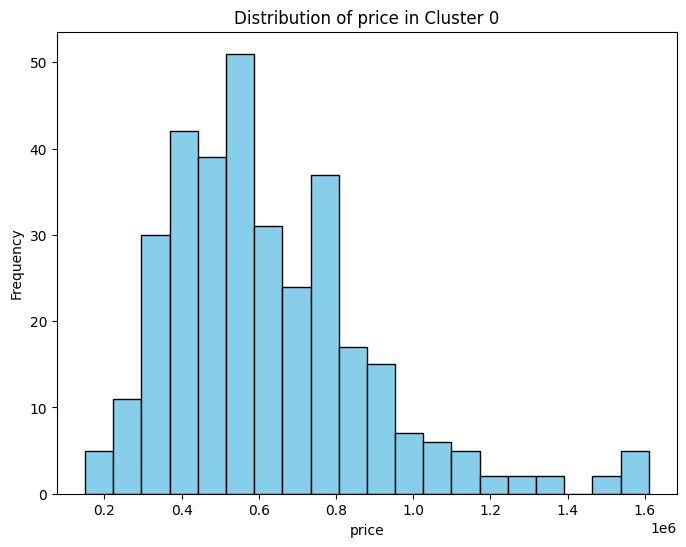

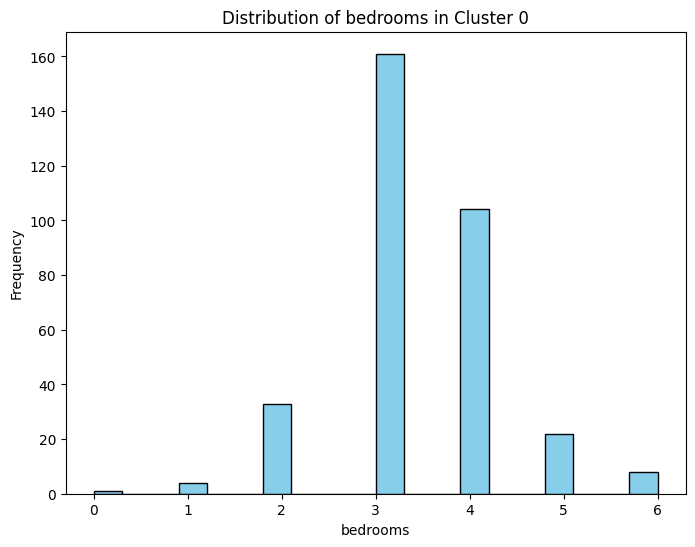

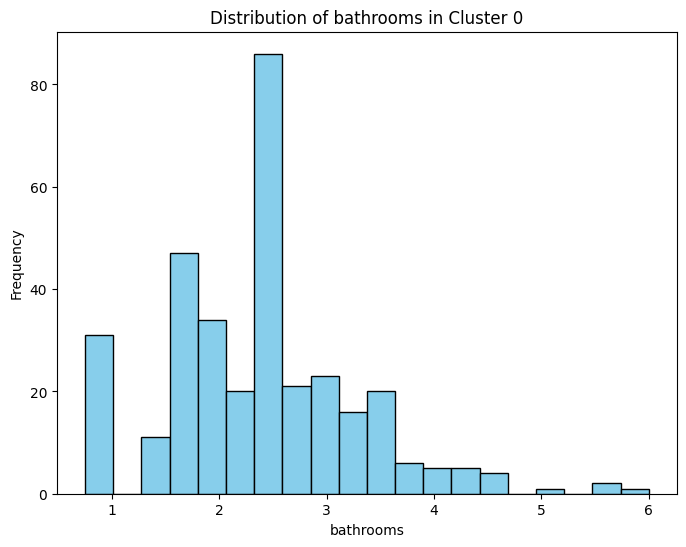

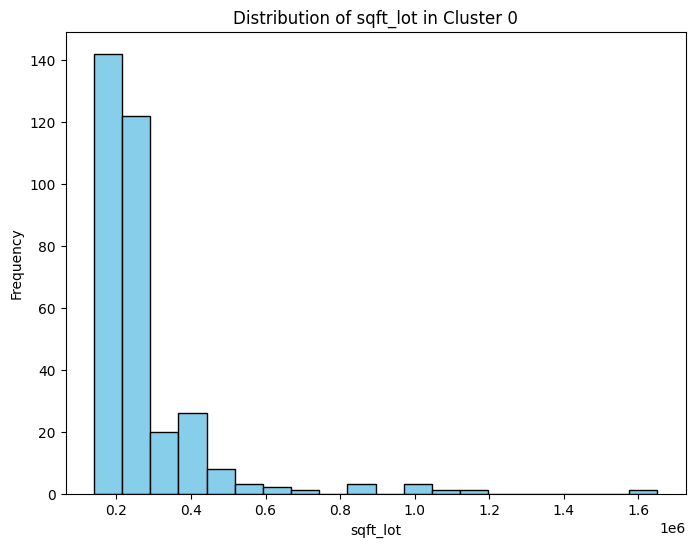

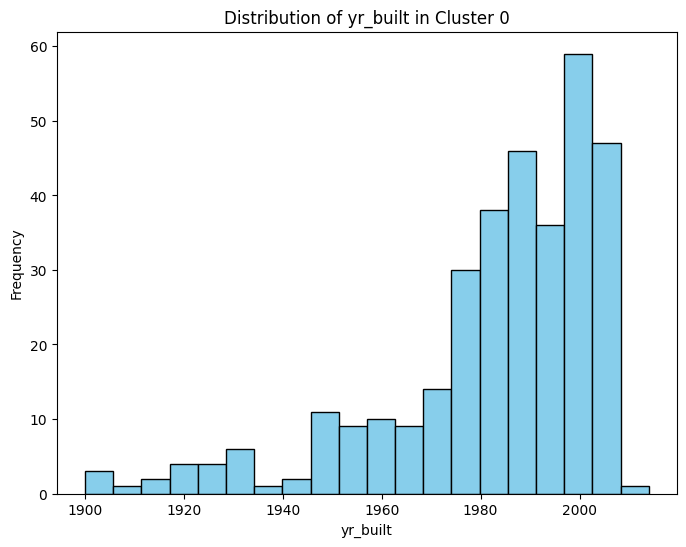

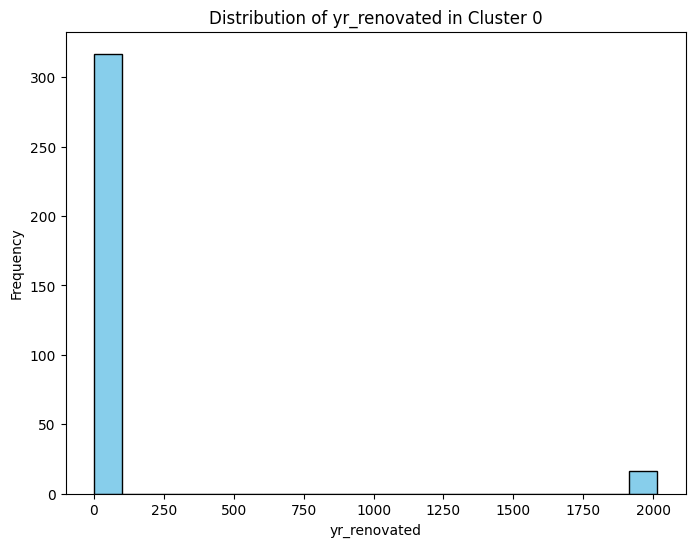

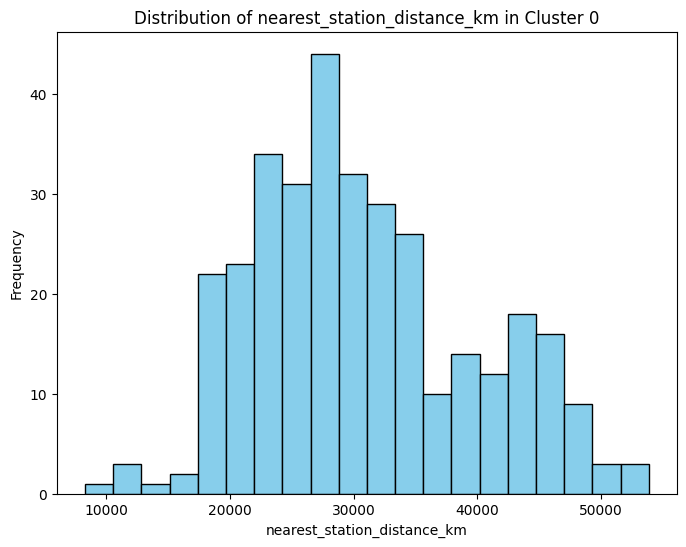

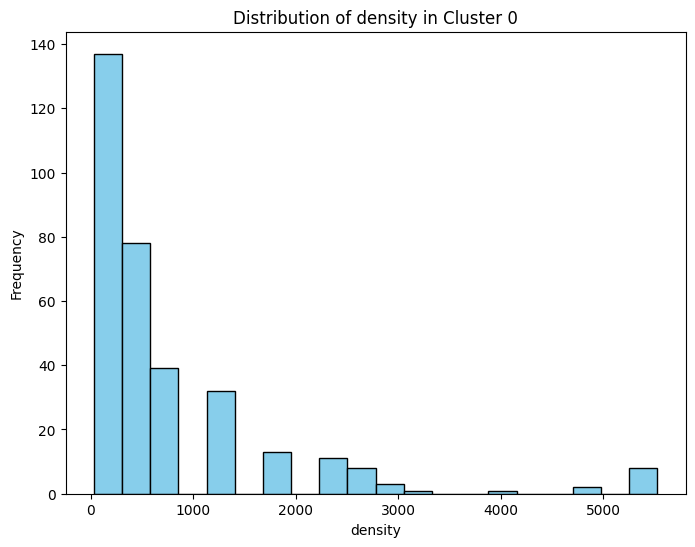

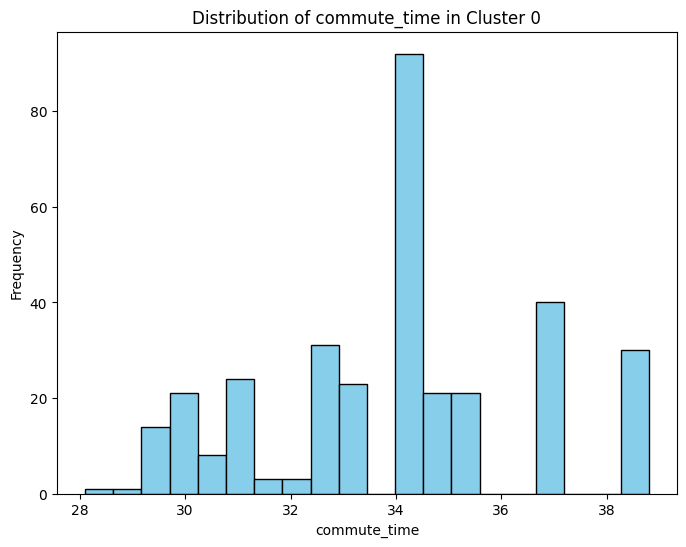

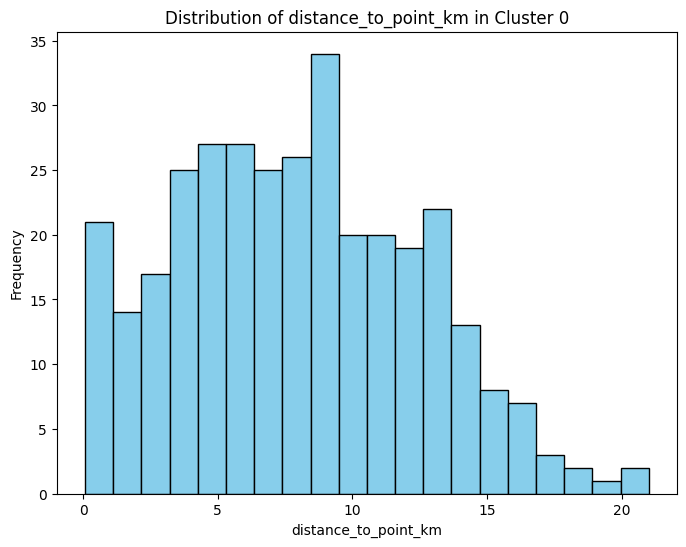

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6862: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

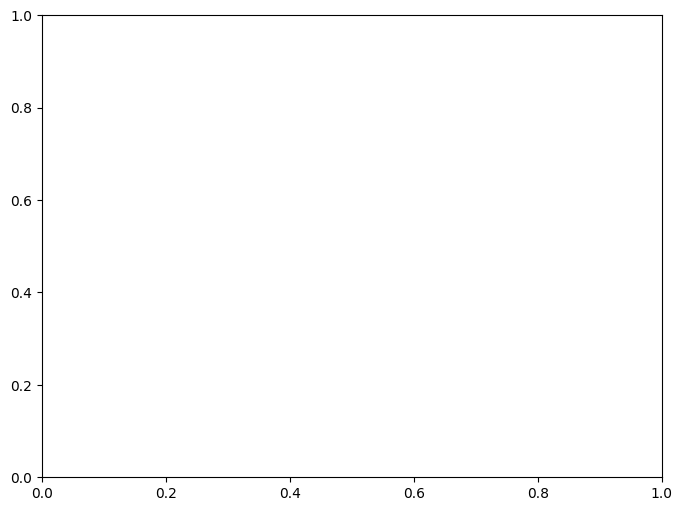

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the clustered data
cluster_0_data = df6[df6['cluster'] == 0]  # Replace 'cluster_label' with the actual column name

# Feature Analysis
for feature in cluster_0_data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(cluster_0_data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature} in Cluster 0')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Summary Statistics
summary_stats = cluster_0_data.describe()

# Anomaly Detection (Optional)
# You can use statistical methods or visualization techniques to identify outliers within cluster 0

# Cluster Profiles
cluster_profile = cluster_0_data.mean()  # Example: Mean of each feature in cluster 0

# Print Summary Statistics and Cluster Profile
print("Summary Statistics for Cluster 0:")
print(summary_stats)
print("\nCluster Profile for Cluster 0:")
print(cluster_profile)


In [208]:

#amke output scrollable
pd.set_option('display.max_rows', None)
print(df6.isna().sum())


price                          0
bedrooms                       0
bathrooms                      0
sqft_lot                       0
waterfront                     0
yr_built                       0
yr_renovated                   0
lat                            0
long                           0
nearest_station_distance_km    0
density                        0
commute_time                   0
distance_to_point_km           0
is_near_shore                  0
grade_living                   0
floors_1.0                     0
floors_1.5                     0
floors_2.0                     0
floors_2.5                     0
floors_3.0                     0
floors_3.5                     0
view_0                         0
view_1                         0
view_2                         0
view_3                         0
view_4                         0
condition_1                    0
condition_2                    0
condition_3                    0
condition_4                    0
condition_

In [222]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Assuming 'df6' is your DataFrame containing the features
# Assuming 'labels' is a Series containing the cluster labels
# Assuming 'prices' is a Series containing the target variable (price)

# Drop 'cluster' and 'price' columns and split into features (X) and target variable (y)
X = df6.drop(columns=['cluster', 'price'])
y = df6['price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data (excluding 'lat' and 'long' columns)
scaler = StandardScaler()
# Concatenate scaled data with unscaled 'lat' and 'long' columns
# Select columns to scale
columns_to_scale = [col for col in X_train.columns if col not in ['lat', 'long']]

# Scale selected columns
X_scaled = scaler.fit_transform(X_train[columns_to_scale])

print("Shape of X_scaled:", X_scaled.shape)

# Concatenate scaled columns with 'lat' and 'long'
X_train_scaled = pd.concat([pd.DataFrame(X_scaled, columns=columns_to_scale), X_train[['lat', 'long']]], axis=1)

# Repeat the same process for the test data
# Select columns to scale
columns_to_scale_test = [col for col in X_test.columns if col not in ['lat', 'long']]

# Scale selected columns
X_test_scaled = scaler.transform(X_test[columns_to_scale_test])

# Concatenate scaled columns with 'lat' and 'long'
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns=columns_to_scale_test), X_test[['lat', 'long']]], axis=1)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train _scaled:", y_train.shape)

# Train XGBoost model on all data
xgb_model_all_data = xgb.XGBRegressor()
xgb_model_all_data.fit(X_train_scaled, y_train)

# Predictions and evaluation on all data
y_pred_all_data = xgb_model_all_data.predict(X_test_scaled)
mse_all_data = mean_squared_error(y_test, y_pred_all_data)
print("Mean Squared Error on all data:", mse_all_data)

# Filter data for cluster label = 1
X_cluster_1 = df6.drop(columns=['cluster', 'price']).loc[df6['cluster'] == 1]
y_cluster_1 = df6['price'].loc[df6['cluster'] == 1]

# Splitting the data for cluster 1 into train and test sets
X_train_cluster_1, X_test_cluster_1, y_train_cluster_1, y_test_cluster_1 = train_test_split(
    X_cluster_1, y_cluster_1, test_size=0.2, random_state=42
)


print('Empty values in y_train_cluster_1:', y_train_cluster_1.isnull().sum())
print('Empty values in y_test_cluster_1:', y_test_cluster_1.isnull().sum())


print("Training set shape for cluster 1:", X_train_cluster_1.shape, y_train_cluster_1.shape)
print("Test set shape for cluster 1:", X_test_cluster_1.shape, y_test_cluster_1.shape)


# Scale the data (excluding 'lat' and 'long' columns)
X_cluster_1_scaled = scaler.fit_transform(X_train_cluster_1.drop(columns=['lat', 'long']))

# Concatenate scaled data with unscaled 'lat' and 'long' columns
X_train_cluster_1_scaled = pd.concat([pd.DataFrame(X_cluster_1_scaled, columns=X_train_cluster_1.columns[:-2]), 
                                     X_train_cluster_1[['lat', 'long']]], axis=1)

# Repeat the same process for the test data
X_test_cluster_1_scaled = scaler.transform(X_test_cluster_1.drop(columns=['lat', 'long']))
X_test_cluster_1_scaled = pd.concat([pd.DataFrame(X_test_cluster_1_scaled, columns=X_test_cluster_1.columns[:-2]), 
                                    X_test_cluster_1[['lat', 'long']]], axis=1)

# Train XGBoost model only on data from cluster 1
xgb_model_cluster_1 = xgb.XGBRegressor()
xgb_model_cluster_1.fit(X_train_cluster_1_scaled, y_train_cluster_1)

# Predictions and evaluation on data from cluster 1
y_pred_cluster_1 = xgb_model_cluster_1.predict(X_test_cluster_1_scaled)
mse_cluster_1 = mean_squared_error(y_test_cluster_1, y_pred_cluster_1)
print("Mean Squared Error on cluster 1 data only:", mse_cluster_1)


Shape of X_scaled: (16965, 100)
Shape of X_train_scaled: (20562, 102)
Shape of y_train _scaled: (16965,)


XGBoostError: [19:26:23] /Users/runner/work/xgboost/xgboost/src/data/data.cc:501: Check failed: this->labels.Size() % this->num_row_ == 0 (16965 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000003100a4994 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x00000003101611fc xgboost::MetaInfo::SetInfoFromHost(xgboost::Context const&, xgboost::StringView, xgboost::Json) + 732
  [bt] (2) 3   libxgboost.dylib                    0x0000000310160dc4 xgboost::MetaInfo::SetInfo(xgboost::Context const&, xgboost::StringView, xgboost::StringView) + 164
  [bt] (3) 4   libxgboost.dylib                    0x00000003100bb688 XGDMatrixSetInfoFromInterface + 224
  [bt] (4) 5   libffi.dylib                        0x00000001a198c050 ffi_call_SYSV + 80
  [bt] (5) 6   libffi.dylib                        0x00000001a1994ae0 ffi_call_int + 1212
  [bt] (6) 7   _ctypes.cpython-311-darwin.so       0x00000001048b81b8 _ctypes_callproc + 1332
  [bt] (7) 8   _ctypes.cpython-311-darwin.so       0x00000001048b0ed4 PyCFuncPtr_call + 1276
  [bt] (8) 9   libpython3.11.dylib                 0x0000000104dd9dc8 _PyObject_MakeTpCall + 344

